In [1]:
import numpy as np
from scipy import constants as const
from phidl import quickplot as qp
from phidl import Device
import phidl.geometry as pg

L:3772 L3:300 f:15.02
L:3972 L3:300 f:14.26
L:4172 L3:300 f:13.58
L:3872 L3:300 f:14.63
L:4272 L3:300 f:13.26
L:4072 L3:300 f:13.91
L:3772 L3:330 f:15.02
L:3972 L3:330 f:14.26
L:4172 L3:330 f:13.58
L:3872 L3:330 f:14.63
L:4272 L3:330 f:13.26
L:4072 L3:330 f:13.91
L:3772 L3:360 f:15.02
L:3972 L3:360 f:14.26
L:4172 L3:360 f:13.58
L:3872 L3:360 f:14.63
L:4272 L3:360 f:13.26
L:4072 L3:360 f:13.91


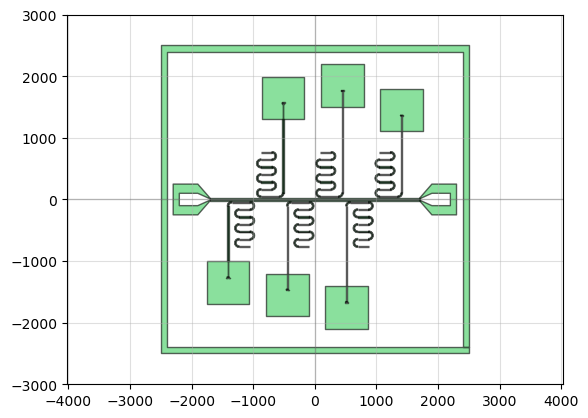

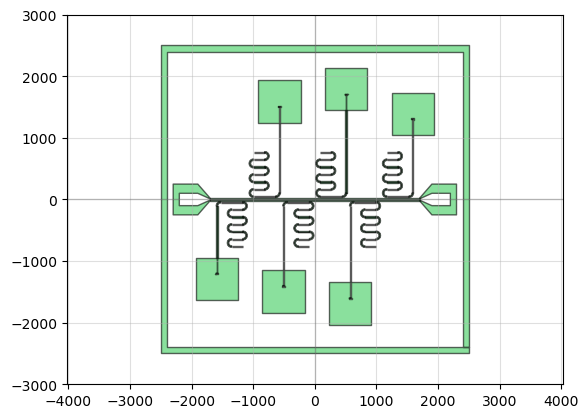

'output/Kobayashi_360Cu.gds'

In [2]:
#make film part
def makeF():
    polpoints=[(-1726.25000,-1954.00000),
        (-1726.25000,-1264.00000),
        (-1386.25000,-1264.00000),
        (-1386.25000,-1516.00000),
        (-1396.25000,-1516.00000),
        (-1396.25000,-1526.00000),
        (-1396.25000,-1526.00000),
        (-1406.25000,-1526.00000),
        (-1406.25000,-1536.00000),
        (-1356.25000,-1536.00000),
        (-1356.25000,-1526.00000),
        (-1366.25000,-1526.00000),
        (-1366.25000,-1516.00000),
        (-1376.25000,-1516.00000),
        (-1376.25000,-1264.00000),
        (-1036.25000,-1264.00000),
        (-1036.25000,-1954.00000)]
    F=Device('film')
    B=F.add_polygon(polpoints)
    F.add_port(name="fport1",midpoint=[-1371.25000,-1516.00000],orientation=-90)
    F.add_port(name="fport2",midpoint=[-1391.25000,-1516.00000],orientation=-90)
    #pi
    AF=pg.arc(radius = 5.0, width = 10.0, theta = 90, start_angle = 0,
            angle_resolution = 2.5, layer = 0)
    AF1_ref=F.add_ref(AF)
    AF2_ref=F.add_ref(AF)
    AF1_ref.connect(port=1,destination=F.ports["fport1"])
    AF2_ref.connect(port=2,destination=F.ports["fport2"])
    F.add_port(name="F_U",midpoint=[-1381.25000,-1264.00000],orientation=90)
    return F


def makeC(r,L1,L2,L3,L4):
    #canvas
    C=Device('unit_curve')
    DO=Device('outer_curve')
    DI=Device('inner_curve')
    #first rectangle
    RV=Device("rec_vertical")
    RV.add_polygon([(0,0),(6,0),(6,L4),(0,L4)])
    RV.add_port(name='recU',midpoint=[3,L4],orientation=90)
    RV.add_port(name='recD',midpoint=[3,0],orientation=-90)
    recov_ref=DO.add_ref(RV)
    reciv_ref=DI.add_ref(RV)
    #second rectangle --long one
    RG=Device("rec_g")
    RG.add_polygon([(0,0),(L3,0),(L3,6),(0,6)])
    RG.add_port(name='recL',midpoint=[0,3],orientation=180)
    RG.add_port(name='recR',midpoint=[L3,3],orientation=0)
    recog_ref=DO.add_ref(RG)
    recig_ref=DI.add_ref(RG)
    #third rectangle --normal one
    #there are four normal rectangle
    #if there are more than two "normal" rectangles, then change ref. to "recon1_ref"
    RN=Device("rec_n")
    RN.add_polygon([(0,0),(L1,0),(L1,6),(0,6)])
    RN.add_port(name='recL',midpoint=[0,3],orientation=180)
    RN.add_port(name='recR',midpoint=[L1,3],orientation=0)
    recon1_ref=DO.add_ref(RN)
    recin1_ref=DI.add_ref(RN)
    recon2_ref=DO.add_ref(RN)
    recin2_ref=DI.add_ref(RN)
    recon3_ref=DO.add_ref(RN)
    recin3_ref=DI.add_ref(RN)
    recon4_ref=DO.add_ref(RN)
    recin4_ref=DI.add_ref(RN)
    recon5_ref=DO.add_ref(RN)
    recin5_ref=DI.add_ref(RN)
    #fourth rectangle --last one
    RL=Device("rec_l")
    RL.add_polygon([(0,0),(L2,0),(L2,6),(0,6)])
    RL.add_port(name='recL',midpoint=[0,3],orientation=180)
    RL.add_port(name='recR',midpoint=[L2,3],orientation=0)
    recol_ref=DO.add_ref(RL)
    recil_ref=DI.add_ref(RL)
    #arc90
    A90_out=pg.arc(radius = r+8, width =6 , theta = 90, start_angle = 90,angle_resolution = 2.5, layer = 0)
    A90_in=pg.arc(radius = r-8, width =6 , theta = 90, start_angle = 90,angle_resolution = 2.5, layer = 0)
    arco1_ref=DO.add_ref(A90_out)
    arci1_ref=DI.add_ref(A90_in)
    #arc180R there are 6 arc
    A180R_out=pg.arc(radius = r+8, width =6 , theta = 180, start_angle = -90,angle_resolution = 2.5, layer = 0)
    A180R_in=pg.arc(radius = r-8, width =6 , theta = 180, start_angle = -90,angle_resolution = 2.5, layer = 0)
    arco2_ref=DO.add_ref(A180R_out)
    arci2_ref=DI.add_ref(A180R_in)
    arco3_ref=DO.add_ref(A180R_in)
    arci3_ref=DI.add_ref(A180R_out)
    arco4_ref=DO.add_ref(A180R_out)
    arci4_ref=DI.add_ref(A180R_in)
    arco5_ref=DO.add_ref(A180R_in)
    arci5_ref=DI.add_ref(A180R_out)
    arco6_ref=DO.add_ref(A180R_out)
    arci6_ref=DI.add_ref(A180R_in)
    arco7_ref=DO.add_ref(A180R_in)
    arci7_ref=DI.add_ref(A180R_out)
    arco3_ref.mirror(p1=[1,1],p2=[1,3])
    arci3_ref.mirror(p1=[1,1],p2=[1,3])
    arco5_ref.mirror(p1=[1,1],p2=[1,3])
    arci5_ref.mirror(p1=[1,1],p2=[1,3])
    arco7_ref.mirror(p1=[1,1],p2=[1,3])
    arci7_ref.mirror(p1=[1,1],p2=[1,3])

    #connecting --outer
    arco1_ref.connect(port=2,destination=recov_ref.ports['recU'])
    recog_ref.connect(port='recL',destination=arco1_ref.ports[1])
    arco2_ref.connect(port=2,destination=recog_ref.ports['recR'])
    recon1_ref.connect(port='recR',destination=arco2_ref.ports[1])
    arco3_ref.connect(port=2,destination=recon1_ref.ports['recL'])
    recon2_ref.connect(port='recR',destination=arco3_ref.ports[1])
    arco4_ref.connect(port=2,destination=recon2_ref.ports['recL'])
    recon3_ref.connect(port='recR',destination=arco4_ref.ports[1])
    arco5_ref.connect(port=2,destination=recon3_ref.ports['recL'])
    recon4_ref.connect(port='recR',destination=arco5_ref.ports[1])
    arco6_ref.connect(port=2,destination=recon4_ref.ports['recL'])
    recon5_ref.connect(port='recR',destination=arco6_ref.ports[1])
    arco7_ref.connect(port=2,destination=recon5_ref.ports['recL'])
    recol_ref.connect(port='recL',destination=arco7_ref.ports[1])

    arci1_ref.connect(port=2,destination=reciv_ref.ports['recU'])
    recig_ref.connect(port='recL',destination=arci1_ref.ports[1])
    arci2_ref.connect(port=2,destination=recig_ref.ports['recR'])
    recin1_ref.connect(port='recR',destination=arci2_ref.ports[1])
    arci3_ref.connect(port=2,destination=recin1_ref.ports['recL'])
    recin2_ref.connect(port='recR',destination=arci3_ref.ports[1])
    arci4_ref.connect(port=2,destination=recin2_ref.ports['recL'])
    recin3_ref.connect(port='recR',destination=arci4_ref.ports[1])
    arci5_ref.connect(port=2,destination=recin3_ref.ports['recL'])
    recin4_ref.connect(port='recR',destination=arci5_ref.ports[1])
    arci6_ref.connect(port=2,destination=recin4_ref.ports['recL'])
    recin5_ref.connect(port='recR',destination=arci6_ref.ports[1])
    arci7_ref.connect(port=2,destination=recin5_ref.ports['recL'])
    recil_ref.connect(port='recL',destination=arci7_ref.ports[1])

    DO_ref=C.add_ref(DO)
    DI_ref=C.add_ref(DI)
    DI_ref.move([16,0])
    C.add_port(name='curve_D',midpoint=[11,0],orientation=-90)
    return C

def makeU(r,L1,L2,L3,L4):
    Uname=unitname(r,L1,L2,L3,L4)
    U=Device(Uname)
    C=makeC(r,L1,L2,L3,L4)
    F=makeF()
    C_ref=U.add_ref(C)
    F_ref=U.add_ref(F)
    F_ref.connect(port='F_U',destination=C_ref.ports['curve_D'])
    print(Uname)
    return U

def getL(r,L1,L2,L3,L4):
    Lrem=267
    L=2*np.pi*r*3.25+5*L1+L2+L3+L4+Lrem
    L=L*1e-6 # convert to real length
    return L

def Cufreq(r,L1,L2,L3,L4):
    L=getL(r,L1,L2,L3,L4)
    f=(2/(2.5+1))**0.5*(const.c/(4*L))
    return f

def unitname(r,L1,L2,L3,L4):
     L=getL(r,L1,L2,L3,L4) #attention! real length
     f=Cufreq(r,L1,L2,L3,L4)
     Ln=round(L*(10**6))
     L3n=round(L3)
     fn=round(f*(10**-9),2)
     n='L:%s L3:%s f:%s' % (Ln,L3n,fn)
     return n

#length unit in name
#L,L3:micormeter f:GHz

#frame
def makeFM():
    FM=Device('frame')
    fmpoints=[(-2500.00000,-2500.00000),
        (-2500.00000,2500.00000),
        (2500.00000,2500.00000),
        (2500.00000,-2400.00000),
        (2400.00000,-2400.00000),
        (2400.00000,2400.00000),
        (-2400.00000,2400.00000),
        (-2400.00000,-2400.00000),
        (2500.00000,-2400.00000),
        (2500.00000,-2500.00000)]
    fm=FM.add_polygon(fmpoints)

    P=Device('plug')
    plugpoints=[(-2300.00000,-250.00000),
        (-2300.00000,250.00000),
        (-1900.00000,250.00000),
        (-1700.00000,21.00000),
        (-1700.00000,10.00000),
        (-1900.00000,100.00000),
        (-2200.00000,100.00000),
        (-2200.00000,-100.00000),
        (-1900.00000,-100.00000),
        (-1700.00000,-10.00000),
        (-1700.00000,-21.00000),
        (-1900.00000,-250.00000)]
    P.add_polygon(plugpoints)

    P1_ref=FM.add_ref(P)
    P2_ref=FM.add_ref(P)
    P2_ref.mirror(p1=(0,1),p2=(0,0))


    flpoints=[(-1700.00000,-21.00000),
        (-1700.00000,-10.00000),
        (1700.00000,-10.00000),
        (1700.00000,-21.00000)]
    FL=Device('feedline')
    FL.add_polygon(flpoints)
    FL1_ref=FM.add_ref(FL)
    FL2_ref=FM.add_ref(FL)
    FL2_ref.mirror(p1=(1,0),p2=(0,0))
    return FM


def uniset(L3):
    margin=45 #margin between two ports
    Lsum=1400 #sum of L3 and L4
    r=60
    L1=180 #width of normal rectangle
    L2=180 #width of last rectangle
    L4=Lsum-L3
    dist=2*margin+2*(2*(r+8)+L3)
    G=Device('ground')
    FM_ref=G.add_ref(makeFM())
    U1_ref=G.add_ref(makeU(r,L1,L2,L3,L4-200))
    U3_ref=G.add_ref(makeU(r,L1,L2,L3,L4))
    U5_ref=G.add_ref(makeU(r,L1,L2,L3,L4+200))
    U1_ref.movey(-U1_ref.ymax-34)
    U3_ref.movey(-U3_ref.ymax-34)
    U5_ref.movey(-U5_ref.ymax-34)
    U1_ref.movex(-(2*(r+8)+L3)-margin/2-dist)
    U3_ref.movex(-(2*(r+8)+L3)-margin/2)
    U5_ref.movex(-(2*(r+8)+L3)-margin/2+dist)

    U2_ref=G.add_ref(makeU(r,L1,L2,L3,L4-100))
    U6_ref=G.add_ref(makeU(r,L1,L2,L3,L4+300))
    U4_ref=G.add_ref(makeU(r,L1,L2,L3,L4+100))
    U2_ref.movey(-U2_ref.ymax-34)
    U6_ref.movey(-U6_ref.ymax-34)
    U4_ref.movey(-U4_ref.ymax-34)
    U2_ref.movex(-(2*(r+8)+L3)-margin/2-dist)
    U6_ref.movex(-(2*(r+8)+L3)-margin/2)
    U4_ref.movex(-(2*(r+8)+L3)-margin/2+dist)
    U2_ref.mirror(p1=(1,0),p2=(0,0))
    U6_ref.mirror(p1=(1,0),p2=(0,0))
    U4_ref.mirror(p1=(1,0),p2=(0,0))
    U2_ref.mirror(p1=(0,1),p2=(0,0))
    U6_ref.mirror(p1=(0,1),p2=(0,0))
    U4_ref.mirror(p1=(0,1),p2=(0,0))

    return G
L3set=[300,330,360]
G1=uniset(L3set[0])
G2=uniset(L3set[1])
G3=uniset(L3set[2])
#G4=uniset(L3set[3])
#G5=uniset(L3set[4])

qp(G1)
qp(G3)
G1.write_gds('output/Kobayashi_%sCu' % L3set[0])
G2.write_gds('output/Kobayashi_%sCu' % L3set[1])
G3.write_gds('output/Kobayashi_%sCu' % L3set[2])